<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Seyed Hamid Ghasemi

**Student ID**: 400109768





## Importing Libraries

First we import libraries that we need for this assignment.

In [1]:
# import any other libraries needed below

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [2]:
X, Y = None, None

### START CODE HERE ###
# Load the CSV file into a DataFrame
df = pd.read_csv('Q3\data2_logistic.csv')

# Extract the features and target variable
X = df[['X1', 'X2', 'X3']].to_numpy()
Y = df['Y'].to_numpy()

### END CODE HERE ###
print(X.shape)
print(Y.shape)
X

(10000, 3)
(10000,)


array([[282.297683  ,  12.49024951,  67.87536941],
       [ -3.13063135, 151.9609093 ,  27.21868028],
       [-60.57513357,  27.72038027,  76.63438079],
       ...,
       [746.479093  , -25.83987506,  17.70013152],
       [-75.49166624, -82.93073882,  19.74406759],
       [794.5164743 , -61.74544262,  -2.12382686]])

Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**:
1. *Sensitivity to feature scale:*
* Logistic regression, as well as other linear models, are sensitive to the scale of the features. If the features have vastly different scales, the model may "think" that features with larger scales are more important, even if they are not.
* Normalization helps to remove this bias by scaling all features to a common range, typically 0 to 1 or -1 to 1.

2. Avoiding the vanishing gradient problem:
* During the training phase of logistic regression, the model uses gradient-based optimization techniques, such as gradient descent, to update the model parameters.
If the features have vastly different scales, the gradients for the features with larger scales may become very small, leading to the vanishing gradient problem. This can slow down or even prevent the model from converging to the optimal solution.
* Normalizing the data helps to ensure that the gradients for all features have a similar scale, which can improve the convergence of the optimization algorithm.

3. Improving model interpretability:
* The coefficients in a logistic regression model represent the relative importance of each feature in the prediction.
If the features are not normalized, the magnitudes of the coefficients will be influenced by the scale of the features, making it difficult to interpret their relative importance.
Normalizing the data can help to make the coefficients more interpretable, as they will reflect the relative importance of the features on the same scale.

In [3]:
### START CODE HERE ###

#normalize the features to have zero mean and unit variance
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

### END CODE HERE ###

In [4]:
X

array([[-0.39714618, -0.18621464,  1.39965469],
       [-1.3868325 ,  1.67490288,  0.07882144],
       [-1.586014  ,  0.01701852,  1.68421286],
       ...,
       [ 1.21234373, -0.6976976 , -0.23041219],
       [-1.63773518, -1.45952669, -0.16400986],
       [ 1.37890723, -1.17682691, -0.87444258]])

Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [5]:
### START CODE HERE ###

# Add a column of 1s at the beginning of X to represent the bias term
X = np.insert(X, 0, np.ones((X.shape[0])), axis=1)

### END CODE HERE ###
print(X.shape)
X

(10000, 4)


array([[ 1.        , -0.39714618, -0.18621464,  1.39965469],
       [ 1.        , -1.3868325 ,  1.67490288,  0.07882144],
       [ 1.        , -1.586014  ,  0.01701852,  1.68421286],
       ...,
       [ 1.        ,  1.21234373, -0.6976976 , -0.23041219],
       [ 1.        , -1.63773518, -1.45952669, -0.16400986],
       [ 1.        ,  1.37890723, -1.17682691, -0.87444258]])

## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [6]:
def sigmoid(Z):
    '''
    Applies the sigmoid function on every element of Z
    Arguments:
        Z can be a (n,) vector or (n , m) matrix
    Returns:
        A vector/matrix, same shape with Z, that has the sigmoid function applied elementwise
    '''
    ### START CODE HERE ###
    return 1 / (1 + np.exp(-np.array(Z)))
    ### END CODE HERE ###

In [7]:
#scaler:
a=0
print("sigmoid(",a,")=",sigmoid(a),"\n")
a= np.inf
print("sigmoid(",a,")=",sigmoid(a),"\n")
a= -np.inf
print("sigmoid(",a,")=",sigmoid(a),"\n")

#vector:
a2 = ([1,2,3])
print("sigmoid(",a2,")=",sigmoid(a2),"\n")

#matrix:
a3 = ([[1,2,3],[4,5,6]])
print("sigmoid(",a3,")=\n",sigmoid(a3),"\n")

sigmoid( 0 )= 0.5 

sigmoid( inf )= 1.0 

sigmoid( -inf )= 0.0 

sigmoid( [1, 2, 3] )= [0.73105858 0.88079708 0.95257413] 

sigmoid( [[1, 2, 3], [4, 5, 6]] )=
 [[0.73105858 0.88079708 0.95257413]
 [0.98201379 0.99330715 0.99752738]] 



### Cost Function 
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [8]:
def computeCost(theta, X, y, regLambda):
    '''
    Computes the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
    '''
    
    m, n = X.shape
    loss = None
    ### START CODE HERE ###
    h = sigmoid(X @ theta)
    loss = -1/m*(np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))) + regLambda / (2 * m) * np.sum(theta[1:]**2)

    ### END CODE HERE ###
    return loss

### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_i} = \frac{1}{m} \sum_{i=1}^m (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})*\mathbf{x}^{(i)} + \frac{\lambda}{m} \theta_i
$$

In [9]:
def computeGradient(theta, X, y, regLambda):
    '''
    Computes the gradient of the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        the gradient, an d-dimensional vector
    '''
    
    m, n = X.shape
    grad = None
    ### START CODE HERE ###
    h = sigmoid(X @ theta)
    grad = np.zeros(np.shape(theta))

    grad[0]= 1/m * np.inner((h-y),X[:,0])
    for i in range(3):
        grad[i+1] = 1/m * np.inner((h-y),X[:,i+1]) + regLambda/m * theta[i+1]


    ### END CODE HERE ###
    return grad

### Training and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [10]:
def fit(X, y, regLambda = 0.01, alpha = 0.01, epsilon = 1e-4, maxNumIters = 100):
    '''
    Trains the model
    Arguments:
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        maxNumIters is the maximum number of gradient descent iterations
        regLambda   is the scalar regularization constant
        epsilon     is the convergence rate
        alpha       is the gradient descent learning rate
    '''
    
    m, n = X.shape
    theta, loss_history = None, None

    ### START CODE HERE ###
    theta = np.zeros(n)
    loss_history = []
    index = 0
    while True:
        if index >= maxNumIters :
            break
        else:
            index += 1

        grad = computeGradient(theta, X, y, regLambda)

        # Update the parameters
        theta_new = theta - alpha * grad

        cost = computeCost(theta_new, X, y, regLambda)
        loss_history.append(cost)

        # Check for convergence
        if hasConverged(theta, theta_new, epsilon):
            theta = theta_new
            break

        theta = theta_new

    ### END CODE HERE ###
    return theta, loss_history




def hasConverged(theta_old, theta_new, epsilon):
    '''
    Return if the theta converged or not
    Arguments:
        theta_old   is the theta calculated in prevoius iteration
        theta_new   is the theta calculated in current iteration
        epsilon     is the convergence rate
    '''
    
    ### START CODE HERE ###
    if np.linalg.norm(theta_new-theta_old) <= epsilon:
        return True
    ### END CODE HERE ###
    return False

Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

In [11]:
theta, loss_history = fit(X, Y) # calculating theta and loss of each iteration

### START CODE HERE ###
print("theta = ",theta)
print()
print(loss_history)
### END CODE HERE ###

theta =  [-0.07917594 -0.12794085  0.34107905  0.00717197]

[0.6913809060118177, 0.6896234948289701, 0.6878749023208994, 0.6861350838563361, 0.6844039948667454, 0.6826815908497671, 0.6809678273725951, 0.6792626600752987, 0.677566044674081, 0.6758779369644807, 0.6741982928245116, 0.6725270682177437, 0.6708642191963253, 0.6692097019039447, 0.6675634725787336, 0.6659254875561126, 0.6642957032715767, 0.6626740762634233, 0.661060563175422, 0.6594551207594275, 0.6578577058779349, 0.6562682755065772, 0.6546867867365673, 0.653113196777083, 0.6515474629575974, 0.6499895427301515, 0.6484393936715747, 0.6468969734856482, 0.6453622400052161, 0.6438351511942413, 0.6423156651498089, 0.6408037401040767, 0.6392993344261743, 0.6378024066240477, 0.6363129153462561, 0.6348308193837151, 0.6333560776713911, 0.6318886492899456, 0.6304284934673297, 0.6289755695803306, 0.6275298371560701, 0.6260912558734544, 0.6246597855645778, 0.6232353862160802, 0.6218180179704573, 0.6204076411273268, 0.6190042161446488, 0.

### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [13]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###

# Assuming X and y are your feature matrix and target variable
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33333, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

### END CODE HERE ###

Training set shape: (7000, 4) (7000,)
Validation set shape: (2000, 4) (2000,)
Test set shape: (1000, 4) (1000,)


Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [14]:
def predict(X, theta):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''
    
    Y = None
    ### START CODE HERE ###
    h = sigmoid(X @ theta)
    Y = (h >= 0.5).astype(int)
    ### END CODE HERE ###
    return Y


Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**:
The effect of the learning rate and regularization constant in logistic regression is crucial for model performance and generalization. Here is a discussion on their impact and how to find the best values for these parameters:

1. **Learning Rate:**
The learning rate controls how quickly the model learns from the training data during gradient descent.
A high learning rate can lead to overshooting the minimum of the cost function, causing instability and divergence.
A low learning rate may result in slow convergence and longer training times.
The optimal learning rate balances the trade-off between convergence speed and stability.


2. **Regularization Constant:**
The regularization constant (lambda) controls the impact of the regularization term in the cost function.
Regularization helps prevent overfitting by penalizing large weights in the model.
A higher regularization constant leads to smaller coefficients and a simpler model, reducing overfitting.
Too high a regularization constant can lead to underfitting, where the model is too simple and fails to capture the underlying patterns in the data.

3. **Finding the Best Values:**
To find the best values of the learning rate and regularization constant, we can perform hyperparameter tuning using techniques like grid search or random search.
Define a grid of learning rates and regularization constants to explore different combinations.
Train multiple models with varying hyperparameters on the training set and evaluate their performance on the validation set.
Choose the hyperparameters that result in the best performance metrics on the validation set.
Finally, evaluate the selected model on the test set to assess its generalization performance.

4. **Impact on Model Performance:**
The learning rate and regularization constant play a critical role in balancing model complexity and generalization.
Optimal values of these parameters can lead to a well-generalized model that performs well on unseen data.
The learning rate affects the convergence speed, while the regularization constant controls the model's complexity.

Best hyperparameters - Learning Rate: 0.1 Regularization Constant: 100
Test set accuracy: 0.97
Train set accuracy: 0.9754444444444444


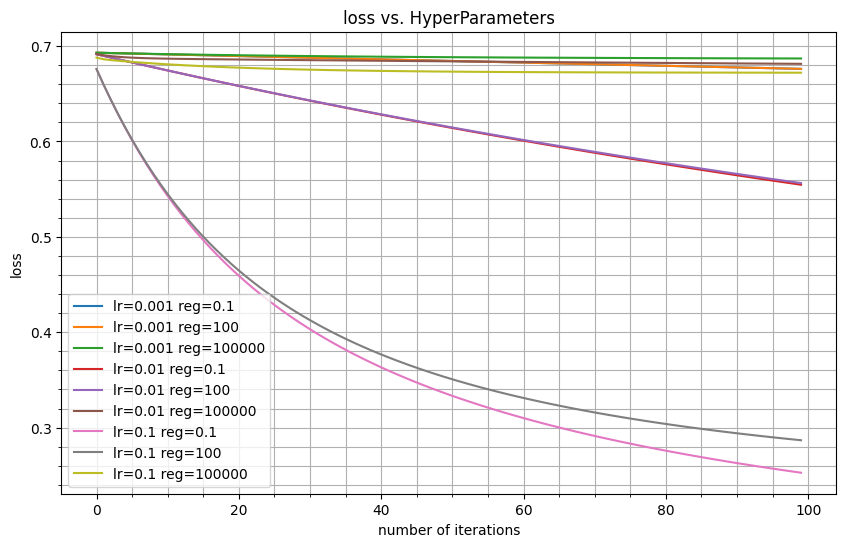

In [39]:
### START CODE HERE ###


# Define lists of learning rates and regularization constants to try
learning_rates = [0.001,0.01,0.1]
regularization_constants = [0.1 ,100, 100000]

best_accuracy = 0
best_theta = None
best_lr = None
best_reg = None

lr_list = []
reg_list = []
loss_list = []

for lr in learning_rates:
    for reg in regularization_constants:
        reg_list.append(reg)
        lr_list.append(lr)
        # Train the logistic regression model on the training set
        theta, loss = fit(X_train, y_train, reg, lr)
        loss_list.append(loss)

        # Make predictions on the validation set
        y_pred = predict(X_val, theta)

        # Evaluate the model's performance on the validation set
        accuracy = np.mean(y_pred == y_val)

        # Check if this model is the best so far
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_theta = theta
            best_lr = lr
            best_reg = reg

# Train the final model using the best hyperparameters on the combined training and validation sets
final_theta, _ = fit(np.vstack((X_train, X_val)), np.concatenate((y_train, y_val)), best_reg, best_lr)

# Evaluate the final model on the test set
y_pred_test = predict(X_test, final_theta)
test_accuracy = np.mean(y_pred_test == y_test)

# Evaluate the final model on the train set
y_pred_train = predict(np.vstack((X_train, X_val)) , final_theta)
train_accuracy = np.mean(y_pred_train == np.concatenate((y_train, y_val)))


print("Best hyperparameters - Learning Rate:", best_lr, "Regularization Constant:", best_reg)
print("Test set accuracy:", test_accuracy)
print("Train set accuracy:", train_accuracy)

# Plot
plt.figure(figsize=(10, 6))
for i in range(len(lr_list)):
    label = "lr="+str(lr_list[i])+" reg="+str(reg_list[i])
    plt.plot(loss_list[i],label=label)
plt.xlabel('number of iterations')
plt.ylabel('loss')
plt.title('loss vs. HyperParameters')
plt.legend()
plt.grid(which='both')
plt.minorticks_on()
plt.show()
### END CODE HERE ###

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:
$$
accuracy(y,y_{pred}) = \frac{1}{m} \sum_{i=1}^m \mathcal{I}(\mathbf{y_i}==\mathbf{y_{pred}_i)
$$

Accuracy of GaussianNB on the test set: 0.9235


In [112]:
### START CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create an instance of the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier on the training set
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Calculate the accuracy of the classifier on the test set
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of GaussianNB on the test set:", accuracy)

### END CODE HERE ###

Accuracy of GaussianNB on the test set: 0.9235


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:
$$
accuracy(y,y_{pred}) = \frac{1}{m} \sum_{i=1}^m \mathcal{I}(\mathbf{y_i}==\mathbf{y_{pred}_i)
$$

Accuracy of GaussianNB on the test set: 0.9685

In [114]:
### START CODE HERE ###
# Create an instance of the LinearDiscriminantAnalysis classifier
lda = LinearDiscriminantAnalysis()

# Train the classifier on the training set
lda.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lda.predict(X_test)

# Calculate the accuracy of the classifier on the test set
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of LinearDiscriminantAnalysis on the test set:", accuracy)
### END CODE HERE ###

Accuracy of LinearDiscriminantAnalysis on the test set: 0.9685


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**:
Based on the previous 3 sections, it was observed that logistic regression is the best method for classifying this dataset.
the best accuracy = 0.97